In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

In [10]:
dfx=dfx.values
dfy=dfy.values

In [11]:
dfx,dfy

(array([[-0.28930742],
        [-0.58880963],
        [ 1.02750749],
        ...,
        [-0.30516366],
        [ 1.67583291],
        [-0.49175724]]), array([[-9.11011171e-02],
        [-5.34677208e+01],
        [ 7.54570088e+01],
        ...,
        [-3.49832749e+01],
        [ 1.45206092e+02],
        [-1.71244939e+01]]))

<function matplotlib.pyplot.show(*args, **kw)>

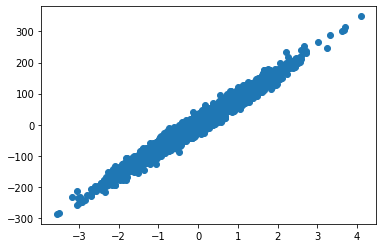

In [12]:
plt.scatter(dfx,dfy)
plt.show

In [13]:
##changing origin for better results
dfx=dfx-np.min(dfx)
dfy=dfy-np.min(dfy)

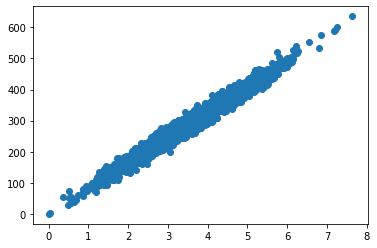

In [21]:
plt.scatter(dfx,dfy)
plt.show()

In [15]:
def h(theta,x):
    return theta[0]+theta[1]*x

In [16]:
def error(theta,x,y):
    m=x.shape[0]
    error=0.0
    for i in range(m):
        error+=(h(theta,x[i])-y[i])**2
        
    return error/(2*m)
        

In [31]:
def gradient(theta,x,y):
    grad=np.zeros((2,))
    m=x.shape[0]
    for i in range(m):
        grad[0]+=(h(theta,x[i])-y[i])
        grad[1]+=(h(theta,x[i])-y[i])*x[i]
        
    return grad[0]/m,grad[1]/m

In [95]:
def best(x,y):
    m=1000
    e=[]
    theta=np.zeros((2,))
    for i in range(m):
        g,k=gradient(theta,x,y)
        theta[0]-=0.01*g
        theta[1]-=0.01*k
        e.append(error(theta,x,y))
    return theta,e

        

In [96]:
theta,e=best(dfx,dfy)

In [97]:
theta


array([12.68334096, 78.52006638])

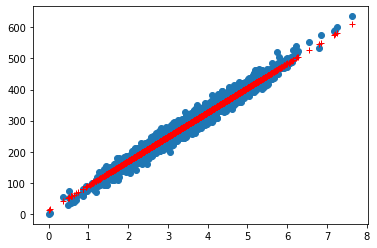

In [98]:
plt.scatter(dfx,dfy)
plt.plot(dfx,h(theta,dfx),'r+')
plt.show()

##We can see that the line goes through the points which suggest our implementation is correct

# It works

In [99]:
print(error(theta,dfx,dfy))

[97.63215829]


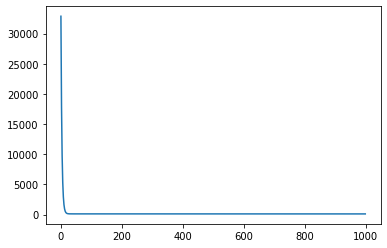

In [100]:
plt.plot(e)
plt.show()

# as we can see that error has reduced to a small value hence our model is working correctly


# time to test it 

In [101]:
test=pd.read_csv("Linear_X_Test.csv")
test=test.values


In [102]:
test


array([[-1.87794441],
       [-0.86903192],
       [-2.53018242],
       ...,
       [ 0.12800782],
       [-0.27803759],
       [-0.68042543]])

In [103]:
y=[]
for i in range(test.shape[0]):
    y.append(h(theta,test[i]))

In [104]:
y

[array([-134.77297909]),
 array([-55.55310276]),
 array([-185.98675097]),
 array([229.41485589]),
 array([59.08871034]),
 array([-89.04729403]),
 array([-2.77160714]),
 array([35.61727451]),
 array([-51.83605603]),
 array([-105.21974762]),
 array([-1.35245416]),
 array([18.35225073]),
 array([-26.9400749]),
 array([75.58883786]),
 array([20.40832092]),
 array([-0.16435244]),
 array([34.87784706]),
 array([114.0688743]),
 array([181.82298012]),
 array([31.56402332]),
 array([-21.24954719]),
 array([30.68040459]),
 array([-42.12720823]),
 array([-134.26511686]),
 array([76.84949065]),
 array([116.39915447]),
 array([160.43886777]),
 array([20.58639644]),
 array([42.82669643]),
 array([-80.63460042]),
 array([137.13009138]),
 array([71.71489904]),
 array([-9.69327348]),
 array([125.86513892]),
 array([172.31998108]),
 array([-78.24817237]),
 array([-138.27021101]),
 array([19.64808663]),
 array([-30.4935597]),
 array([35.26238676]),
 array([45.26688617]),
 array([14.86541165]),
 array([32

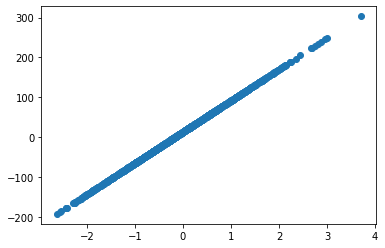

In [105]:
plt.scatter(test,y)
plt.show()

In [107]:
df=pd.DataFrame(y,columns=['y'])

In [108]:
df.to_csv('output1.csv',index=False)

# This model got accuracy of 96 percent which is good